<a href="https://colab.research.google.com/github/hyyy11/colab0000/blob/main/10%EC%9D%BC%EC%B0%A8_0326.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def im2col(img, flt_h, flt_w):      #입력 이미지, 필터 높이, 폭


    img_h, img_w = img.shape         #입력 이미지의 높이, 폭
    out_h = img_h - flt_h + 1       #출력 이미지의 높이(패딩없음, 스트라이드1)
    out_w = img_w - flt_w + 1       #출력 이미지의 폭(패딩 없음, 스트라이드1)
    cols = np.zeros((flt_h*flt_w, out_h*out_w))     #생성되는 행렬의 크기

    for h in range(out_h):
       h_lim = h + flt_h      #h:필터가 걸리는 영역의 위쪽 끝, h_lim: 필터가 걸리는 영역의 아래쪽 끝

       for w in range(out_w):
           w_lim = w + flt_w   #w: 필터가 걸리는 영역의 왼쪽 끝, w_lim: 필터가 걸리는 영역의 오른쪽 끝

           cols[:, h*out_w+w] = img[h:h_lim, w:w_lim].reshape(-1)


    return cols

In [ ]:
img = np.array([[1, 2, 3, 4],           #입력 이미지
                [5, 6, 7, 8],
                [9, 10, 11, 12],
                [13, 14, 15, 16]])
                


cols = im2col(img, 2, 2)      #입력 이미지와 필터의 높이, 폭을 전달한다

print(cols)

[[ 1.  2.  3.  5.  6.  7.  9. 10. 11.]
 [ 2.  3.  4.  6.  7.  8. 10. 11. 12.]
 [ 5.  6.  7.  9. 10. 11. 13. 14. 15.]
 [ 6.  7.  8. 10. 11. 12. 14. 15. 16.]]


In [ ]:
def im2col(images, flt_h, flt_w, stride, pad):


    n_bt, n_ch, img_h, img_w = images.shape
    out_h = (img_h - flt_h + 2*pad)  //  stride + 1    #출력 이미지의 높이
    out_w = (img_w - flt_w + 2*pad)  //  stride + 1    #출력 이미지의 폭


    img_pad = np.pad(images, [(0,0), (0,0), (pad,pad), (pad,pad)], "constant")
    cols = np.zeros((n_bt, n_ch, flt_h, flt_w, out_h, out_w))


    for h in range(flt_h):
        h_lim = h + stride*out_h
        for w in range(flt_w):
            w_lim = w + stride*out_w
            cols[:, :, h, w, :, :] = img_pad[:, :, h:h_lim:stride, w:w_lim:stride]

    cols = cols.transpose(1, 2, 3, 0, 4, 5).reshape(n_ch*flt_h*flt_w, n_bt*out_h*out_w)
    return cols

In [ ]:
img = np.array([[[[1, 2, 3, 4],     #입력 이미지
                  [5, 6, 7, 8],
                  [9, 10,11,12],
                  [13,14,15,16]]]])


cols = im2col(img, 2, 2, 1, 0)    #입력 이미지, 필터의 높이, 폭, 스트라이드, 패딩 폭
print(cols)

[[ 1.  2.  3.  5.  6.  7.  9. 10. 11.]
 [ 2.  3.  4.  6.  7.  8. 10. 11. 12.]
 [ 5.  6.  7.  9. 10. 11. 13. 14. 15.]
 [ 6.  7.  8. 10. 11. 12. 14. 15. 16.]]


<function matplotlib.pyplot.show(close=None, block=None)>

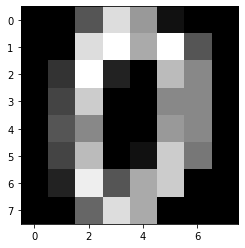

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()

image = digits.data[0].reshape(8,8)
plt.imshow(image, cmap="gray")          #최초의 손으로 쓴 문자 이미지를 표시
plt.show

In [ ]:
def im2col(img, flt_h, flt_w, out_h, out_w):      #입력 이미지 필터의 높이, 폭, 출력의 이미지의 높이, 폭
    cols = np.zeros((flt_h*flt_w, out_h*out_w))   #생성되는 행렬의 크기 

    for h in range(out_h):
        h_lim = h + flt_h      #h:필터가 걸리는 영역의 위쪽 끝, h_lim:필터가 걸리는 영역의 아래쪽 끝
        for w in range(out_w):
            w_lim = w + flt_w  #w:필터가 걸리는 영역의 왼쪽 끝, w_lim:필터가 걸리는 영역의 오른쪽 끝
            cols[:, h*out_w+w] = img[h:h_lim, w:w_lim].reshape(-1)

    return cols

<function matplotlib.pyplot.show(close=None, block=None)>

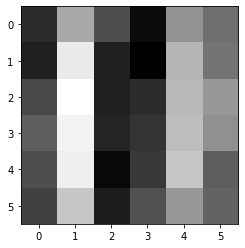

In [ ]:
flt = np.array([[-1, 1, -1,],     #세로 선을 강조하는 필터
                [-1, 1, -1,],
                [-1, 1, -1,]])

flt_h, flt_w = flt.shape
flt = flt.reshape(-1)             #행 수가 1인 행렬


img_h, img_w = image.shape        #입력 이미지의 높이, 폭
out_h = img_h - flt_h + 1         #출력 이미지의 높이(패딩없음, 스트라이드1)
out_w = img_w - flt_w + 1         #출력 이미지의 폭(패딩없음, 스트라이드1)

cols = im2col(image, flt_h, flt_w, out_h, out_w)


image_out = np.dot(flt, cols)     #합성곱
image_out = image_out.reshape(out_h, out_w)
plt.imshow(image_out, cmap="gray")
plt.show

(1797, 64)


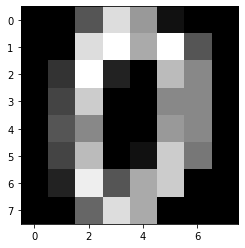

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


digits = datasets.load_digits()
print(digits.data.shape)


image = digits.data[0].reshape(8, 8)
plt.imshow(image, cmap="gray")
plt.show()

In [ ]:
def im2col(img, flt_h, flt_w, out_h, out_w, stride):       #입력 이미지, 풀링 영역의 높이, 폭, 출력 이미지의 높이, 폭, 스트라이드
    cols = np.zeros((flt_h*flt_w, out_h*out_w))        #생성되는 행렬의 크기
    for h in range(out_h):
        h_lim = stride*h + flt_h     #h:풀링 영역의 위쪽 끝, h_lim:풀링 영역의 아래쪽 끝
        for w in range(out_w):
            w_lim = stride*w + flt_w   #풀링 영역의 왼쪽 끝, w_lim = 풀링 영역의 오른쪽 끝
            cols[:, h*out_w+w] = img[stride*h:h_lim, stride*w:w_lim].reshape(-1)


            return cols

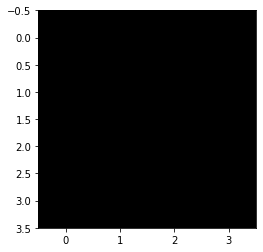

In [ ]:
img_h, img_w = image.shape    #입력 이미지의 높이, 폭
pool = 2    #풀링 영역의 크기


out_h = img_h//pool     #출력 이미지의 높이
out_w = img_w//pool     #출력 이미지의 폭


cols = im2col(image, pool, pool, out_h, out_w, pool)       #스트라이드 크기를 풀링 영역의 크기와 같게
image_out = np.max(cols, axis=0)      #각 열의 최댓값을 취득(Max 풀링)
image_out = image_out.reshape(out_h, out_w)    #출력의 형태를 갖춘다


plt.imshow(image_out, cmap="gray")
plt.show()